In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Load the dataset
file_path = '/home/sdruci/Q-OpticsLaser/lab4/Mod_Laser_emission_DL_ECLSFL1550S.xlsx'
data = pd.read_excel(file_path, sheet_name='Foglio1')

# Extract relevant columns
current = data['Current (mA)']  # Current in mA
voltage = data['Voltage drop (V)']  # Voltage in V
output_power = data['Output power (mW)']  # Output power in mW

In [3]:
# Convert current to amperes for calculations
current_amperes = current * 1e-3

# Define a linear function for output power vs. current (above threshold)
def linear_model(I, I_th, slope):
    return slope * np.maximum(I - I_th, 0)

# Fit the linear model to the output power vs. current data
initial_guess_power = [10, 1]  # Initial guess for I_th (mA) and slope (mW/mA)
popt_power, _ = curve_fit(linear_model, current, output_power, p0=initial_guess_power)

# Define a quadratic model for voltage vs. current
def quadratic_model(I, a, b, c):
    return a * I**2 + b * I + c

# Provide an initial guess for the quadratic model fit
initial_guess_voltage = [-1e-3, 1e-2, 0.2]
popt_voltage, _ = curve_fit(quadratic_model, current[:23], voltage[:23], p0=initial_guess_voltage)

# Calculate slope efficiency (dP/dI above threshold)
slope_efficiency = popt_power[1]  # Slope from the linear fit is the slope efficiency


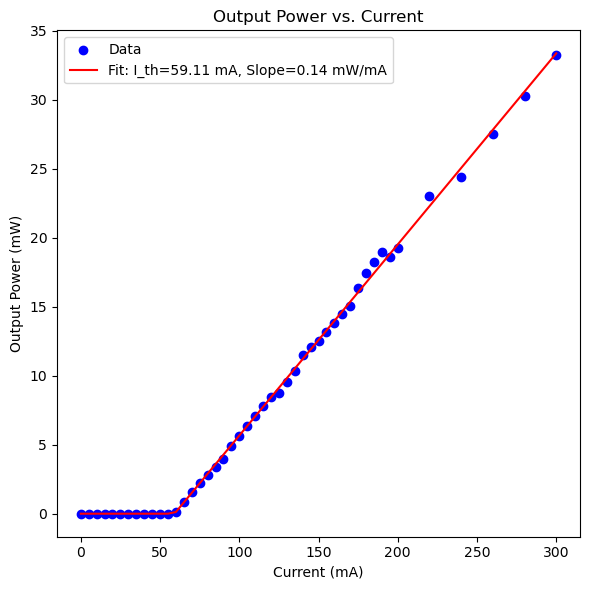

Fitted parameters for Output Power vs. Current:
Threshold current (I_th): 59.11 mA
Slope (Laser Slope Efficiency): 0.14 mW/mA

Fitted parameters for Voltage vs. Current:
a: -4.53e-05
b: 8.06e-03
c: 0.63


In [4]:
# Generate plots
plt.figure(figsize=(6, 6))

plt.scatter(current, output_power, label='Data', color='blue')
plt.plot(current, linear_model(current, *popt_power), label=f'Fit: I_th={popt_power[0]:.2f} mA, Slope={popt_power[1]:.2f} mW/mA', color='red')
plt.title('Output Power vs. Current')
plt.xlabel('Current (mA)')
plt.ylabel('Output Power (mW)')
plt.legend()


plt.tight_layout()
plt.show()

# Print fitted parameters
print("Fitted parameters for Output Power vs. Current:")
print(f"Threshold current (I_th): {popt_power[0]:.2f} mA")
print(f"Slope (Laser Slope Efficiency): {slope_efficiency:.2f} mW/mA")

print("\nFitted parameters for Voltage vs. Current:")
print(f"a: {popt_voltage[0]:.2e}")
print(f"b: {popt_voltage[1]:.2e}")
print(f"c: {popt_voltage[2]:.2f}")

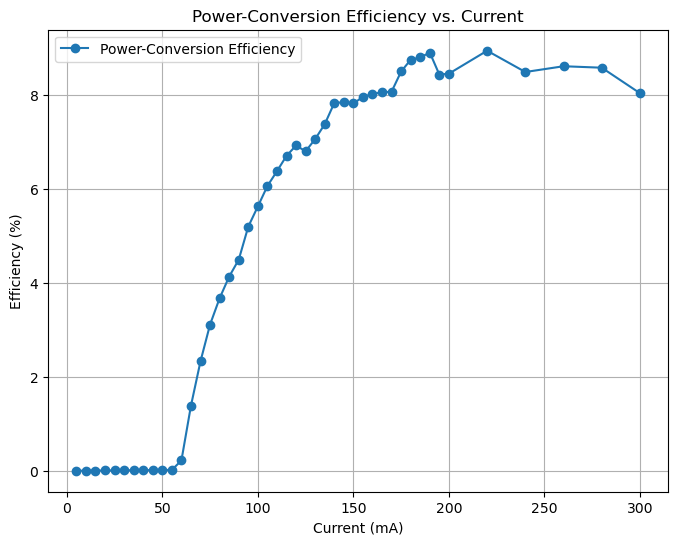

Average Power-Conversion Efficiency: 5.06 %


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/home/sdruci/Q-OpticsLaser/lab4/Mod_Laser_emission_DL_ECLSFL1550S.xlsx'
data = pd.read_excel(file_path, sheet_name='Foglio1')

# Extract relevant columns
current = data['Current (mA)'] * 1e-3  # Convert to amperes
voltage = data['Voltage drop (V)']  # In volts
output_power = data['Output power (mW)'] * 1e-3  # Convert to watts

# Calculate electrical input power
electrical_power = voltage * current  # In watts

# Calculate power-conversion efficiency
efficiency = output_power / electrical_power  # Ratio (unitless)

# Plot efficiency vs. current
plt.figure(figsize=(8, 6))
plt.plot(current * 1e3, efficiency * 100, marker='o', label='Power-Conversion Efficiency')
plt.title('Power-Conversion Efficiency vs. Current')
plt.xlabel('Current (mA)')
plt.ylabel('Efficiency (%)')
plt.grid()
plt.legend()
plt.show()

# Print average efficiency
average_efficiency = efficiency.mean() * 100  # Convert to percentage
print(f'Average Power-Conversion Efficiency: {average_efficiency:.2f} %')


####################################################################################################################################################################

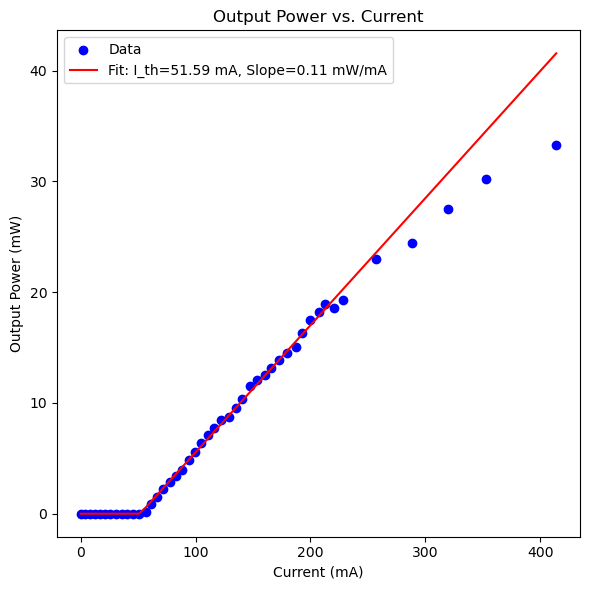

Fitted parameters for Output Power vs. Current:
Threshold current (I_th): 51.59 mA
Slope (Laser Slope Efficiency): 0.11 mW/mA


In [3]:
# Load the dataset
file_path = '/home/sdruci/Q-OpticsLaser/lab4/Mod_Laser_emission_DL_ECLSFL1550S.xlsx'
data = pd.read_excel(file_path, sheet_name='Foglio1')

# Extract relevant columns
current = data['Current (mA)']  # Current in mA
voltage = data['Voltage drop (V)']  # Voltage in V
output_power = data['Output power (mW)']  # Output power in mW

# Calculate the electrical power input (V * I)
electrical_power = voltage * current   # In watts (W)

# Define a linear model for output power vs. electrical power
def linear_model(p, p_th, slope):
    return slope * np.maximum(p - p_th, 0)


initial_guess_power = [50, 0.14]  # Initial guess for I_th (mA) and slope (mW/mA)
popt_power, _ = curve_fit(linear_model, electrical_power[:41], output_power[:41], p0=initial_guess_power)

# Calculate slope efficiency (dP/dI above threshold)
slope_efficiency = popt_power[1]  # Slope from the linear fit is the slope efficiency


# Generate plots
plt.figure(figsize=(6, 6))

plt.scatter(electrical_power, output_power, label='Data', color='blue')
plt.plot(electrical_power, linear_model(electrical_power, *popt_power), label=f'Fit: I_th={popt_power[0]:.2f} mA, Slope={popt_power[1]:.2f} mW/mA', color='red')
plt.title('Output Power vs. Current')
plt.xlabel('Current (mA)')
plt.ylabel('Output Power (mW)')
plt.legend()


plt.tight_layout()
plt.show()

# Print fitted parameters
print("Fitted parameters for Output Power vs. Current:")
print(f"Threshold current (I_th): {popt_power[0]:.2f} mA")
print(f"Slope (Laser Slope Efficiency): {slope_efficiency:.2f} mW/mA")